<a href="https://colab.research.google.com/github/Alex-Ukraine/ml-selfedu/blob/main/batch_normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Batch normalization:
Возможные эффекты, они могу как появаиться так и не появиться.
* ускорение сходимости к модели обучающей выборки;
* большая независимость обучения каждого слоя нейронов;
* возможность увеличения шага обучения;
* в некоторой степени предотвращаяем эффект переобучения;
* меньшая чувствительность к начальной инициализации весовых коэффициентов.

рекомендация 2: Изначально строить нейронные сети без batch normalization (или dropout) и если наблюдается медленное обучение или эффект переобучения, то можно попробовать добавить batch normalization или dropout, но не оба вместе.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist # 60 000 изображений в обучающей выборке и 10 000 в тестовой
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
%matplotlib inline

Загрузка обучающей и тестовой выборок

* x_train - изображения цыфр обучающей выборки;
* y_train - вектор соответствуюющих значений цифр (например, если на i-м изображении нарисована 5, то y_train[i]=5);
* x_test - изображения цифр тестовой выборки;
* y_test - вектор соответствующих значений цифр для тестовой выборки.

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # загружаем данные в коллекции

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
# стандартизация входных данных
x_train = x_train / 255
x_test = x_test / 255

Преобразование входных данных значений в векторы по категориям

In [4]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [5]:
limit = 5000
x_train_data = x_train[:limit]
y_train_data = y_train_cat[:limit]

x_valid = x_train[limit:limit*2]
y_valid = y_train_cat[limit:limit*2]

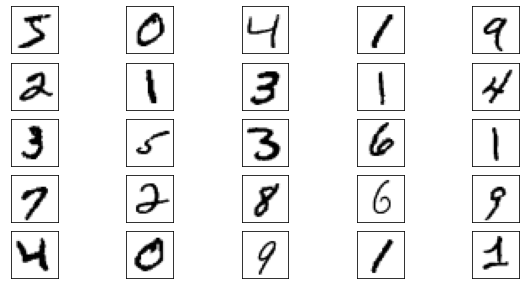

In [6]:
# отображение первых 25 изображенийиз обучающей выборки
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()

Формирование модели НС и вывод её структуры в консоль

In [7]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(300, activation='relu'),
    BatchNormalization(), # обычно помогает при deep learning
    Dense(10, activation='softmax')
])

print(model.summary()) # вывод структуры НС в консоль

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
batch_normalization (BatchNo (None, 300)               1200      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3010      
Total params: 239,710
Trainable params: 239,110
Non-trainable params: 600
_________________________________________________________________
None


Компиляция НС с оптимизацией по Adam и критерием - категориальная кросс-энтропия

In [8]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy', # любимчик публики задачи классификации
              metrics=['accuracy'])

Запуск процесса обучения: 80% - обучающая выборка, 20% - выборка валидации

In [9]:
# validation_split - разбиение на обучающую выборку и проверочную
his = model.fit(x_train_data, y_train_data, batch_size=32, epochs=50, validation_data=(x_valid, y_valid)) 

Epoch 1/50
157/157 [==============================] - 1s 5ms/step - loss: 0.4691 - accuracy: 0.8570 - val_loss: 0.4877 - val_accuracy: 0.8984
Epoch 2/50
157/157 [==============================] - 1s 4ms/step - loss: 0.1795 - accuracy: 0.9506 - val_loss: 0.2844 - val_accuracy: 0.9140
Epoch 3/50
157/157 [==============================] - 1s 4ms/step - loss: 0.1082 - accuracy: 0.9722 - val_loss: 0.2397 - val_accuracy: 0.9238
Epoch 4/50
157/157 [==============================] - 1s 4ms/step - loss: 0.0680 - accuracy: 0.9844 - val_loss: 0.2372 - val_accuracy: 0.9288
Epoch 5/50
157/157 [==============================] - 1s 4ms/step - loss: 0.0421 - accuracy: 0.9926 - val_loss: 0.2215 - val_accuracy: 0.9344
Epoch 6/50
157/157 [==============================] - 1s 4ms/step - loss: 0.0294 - accuracy: 0.9934 - val_loss: 0.2199 - val_accuracy: 0.9358
Epoch 7/50
157/157 [==============================] - 1s 4ms/step - loss: 0.0279 - accuracy: 0.9960 - val_loss: 0.2273 - val_accuracy: 0.9358
Epoch 

получим loss и accuracy

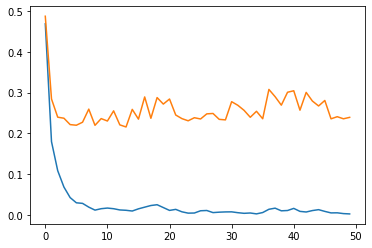

In [10]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.show()

In [11]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.2181 - accuracy: 0.9503


[0.21809452772140503, 0.9502999782562256]

Проверка распознавания цифр:

[[1.3039072e-09 9.9999845e-01 1.1487626e-08 2.2292887e-10 2.7268958e-09
  4.6384157e-11 9.8773066e-11 1.6018851e-06 5.1572493e-09 5.3009486e-10]]
Распознанная цифра: 1


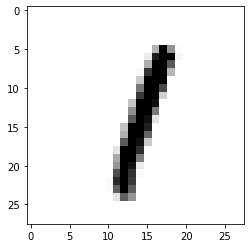

In [12]:
n = 5
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x) # x - тензор, поэтому добавили одну размерность выше
print(res)
print(f"Распознанная цифра: {np.argmax(res)}") # индекс максимального значения

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

Распознавание всей тестовой выборки:

In [13]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:30])
print(y_test[:30])

(10000,)
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]


Выделение неверных вариантов:

In [14]:
mask = pred ==y_test
print(mask[:10])

x_false = x_test[~mask] # ~ означает отрицать, поменять значение на противоположное
p_false = pred[~mask]

print(x_false.shape)

[ True  True  True  True  True  True  True  True False  True]
(497, 28, 28)


Вывод первых 5 неверных результатов

Значение сети: 6


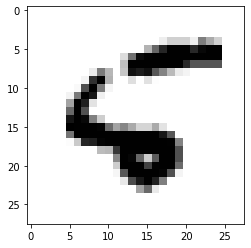

Значение сети: 2


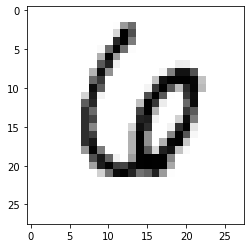

Значение сети: 7


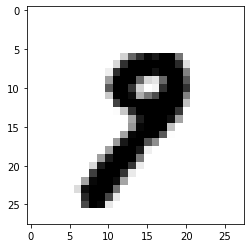

Значение сети: 4


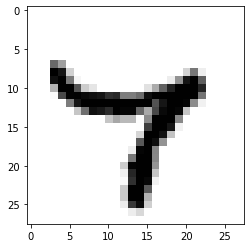

Значение сети: 8


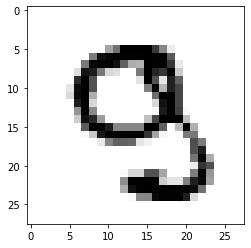

In [15]:
for i in range(5):
    print("Значение сети: "+str(p_false[i]))
    plt.imshow(x_false[i], cmap=plt.cm.binary)
    plt.show()